# 2.3 Complex Machine Learning Models Pt 2

# Import Libraries and Data

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

2025-03-26 12:18:04.267542: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
#Import unscaled weather dataset
df_weather = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/Supervised/weather_cleaned.csv')

In [25]:
df_weather.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,1960-01-01
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,...,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,1960-01-02
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,...,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,1960-01-03
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,8,...,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,1960-01-04
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,1960-01-05


In [27]:
df_weather.shape

(22950, 136)

In [14]:
#Import Prediction Data Set
df_answers = pd.read_csv('/Users/ariedlin/Desktop/Career Foundry Assignments/Machine Learning/2. Data/Supervised/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [16]:
df_answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df_answers.shape

(22950, 16)

# Data Wrangling and Cleaning

In [31]:
#Reduce weather dataset to observations in the 2010's decade
df_decade = df_weather[(df_weather['DATE'].astype(str).str[:4] >= '2010') & (df_weather['DATE'].astype(str).str[:4] <= '2019')]
df_decade

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
18263,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,...,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0,2010-01-01
18264,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,0.4,8,...,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2,2010-01-02
18265,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,1.1,7,...,4,0.71,1.0196,0.36,0.41,1.6,0.5,-4.1,5.1,2010-01-03
18266,5,0.83,1.0169,0.48,0.00,3.7,-4.9,-8.3,-3.1,2,...,2,0.67,1.0219,0.48,0.51,6.5,3.7,1.3,3.8,2010-01-04
18267,7,0.78,1.0073,0.53,0.04,4.4,-4.0,-7.1,-1.5,6,...,4,0.78,1.0117,0.45,0.09,4.7,2.3,-0.7,5.4,2010-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,8,0.92,1.0273,0.15,0.52,0.1,6.8,5.6,7.9,5,...,5,0.82,1.0142,0.04,0.41,3.4,10.7,7.9,13.5,2019-12-27
21911,7,0.86,1.0380,0.35,0.00,1.3,3.7,-0.6,5.7,8,...,5,0.82,1.0142,0.20,0.41,3.4,10.7,7.9,13.5,2019-12-28
21912,6,0.93,1.0387,0.61,0.00,4.9,-0.8,-2.7,2.6,8,...,5,0.82,1.0142,0.24,0.41,3.4,10.7,7.9,13.5,2019-12-29
21913,1,0.81,1.0354,0.64,0.00,6.5,0.5,-3.0,5.1,6,...,5,0.82,1.0142,0.06,0.41,3.4,10.7,7.9,13.5,2019-12-30


In [35]:
#Reduce answers dataset to observations from 2010's decade
answers_decade = df_answers[(df_answers['DATE'].astype(str).str[:4] >= '2010') & (df_answers['DATE'].astype(str).str[:4] <= '2019')]
answers_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
#Set display options to show all rows
pd.set_option('display.max_rows', None)

In [39]:
#Extract stations list
stations = [col.split('_')[0] for col in df_decade.columns if '_' in col]

In [41]:
#Create a set of unique station names
unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [43]:
#Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  df_decade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  df_decade[station_columns].notna().sum().sum()

#Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
BASEL: 32868 entries
BELGRADE: 32868 entries
KASSEL: 32868 entries
STOCKHOLM: 32868 entries
HEATHROW: 32868 entries
VALENTIA: 32868 entries
DEBILT: 32868 entries
LJUBLJANA: 32868 entries
MAASTRICHT: 32868 entries
SONNBLICK: 32868 entries
DUSSELDORF: 32868 entries
OSLO: 32868 entries
MADRID: 32868 entries
BUDAPEST: 32868 entries
MUNCHENB: 32868 entries


In [45]:
#Drop DATE column
df_decade.drop(['DATE'], axis=1, inplace=True)

In [47]:
#Ensure correct shape
df_decade.shape

(3652, 135)

In [49]:
#Drop 'DATE column from answers 
answers_decade.drop(columns = 'DATE', inplace = True)

In [51]:
#Ensure correct shape
answers_decade.shape

(3652, 15)

# Shaping the Data for Modelling

In [54]:
#Set the X axis with the 2010's weather data
X = df_decade

In [56]:
#Set the y axis with the 2010's answer data
y = answers_decade

In [60]:
#Ensure correct shapes
X.shape

(3652, 135)

In [62]:
y.shape

(3652, 15)

# Splitting the Data

In [65]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [67]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


# Creating Random Forest Model

In [70]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5947426067907996


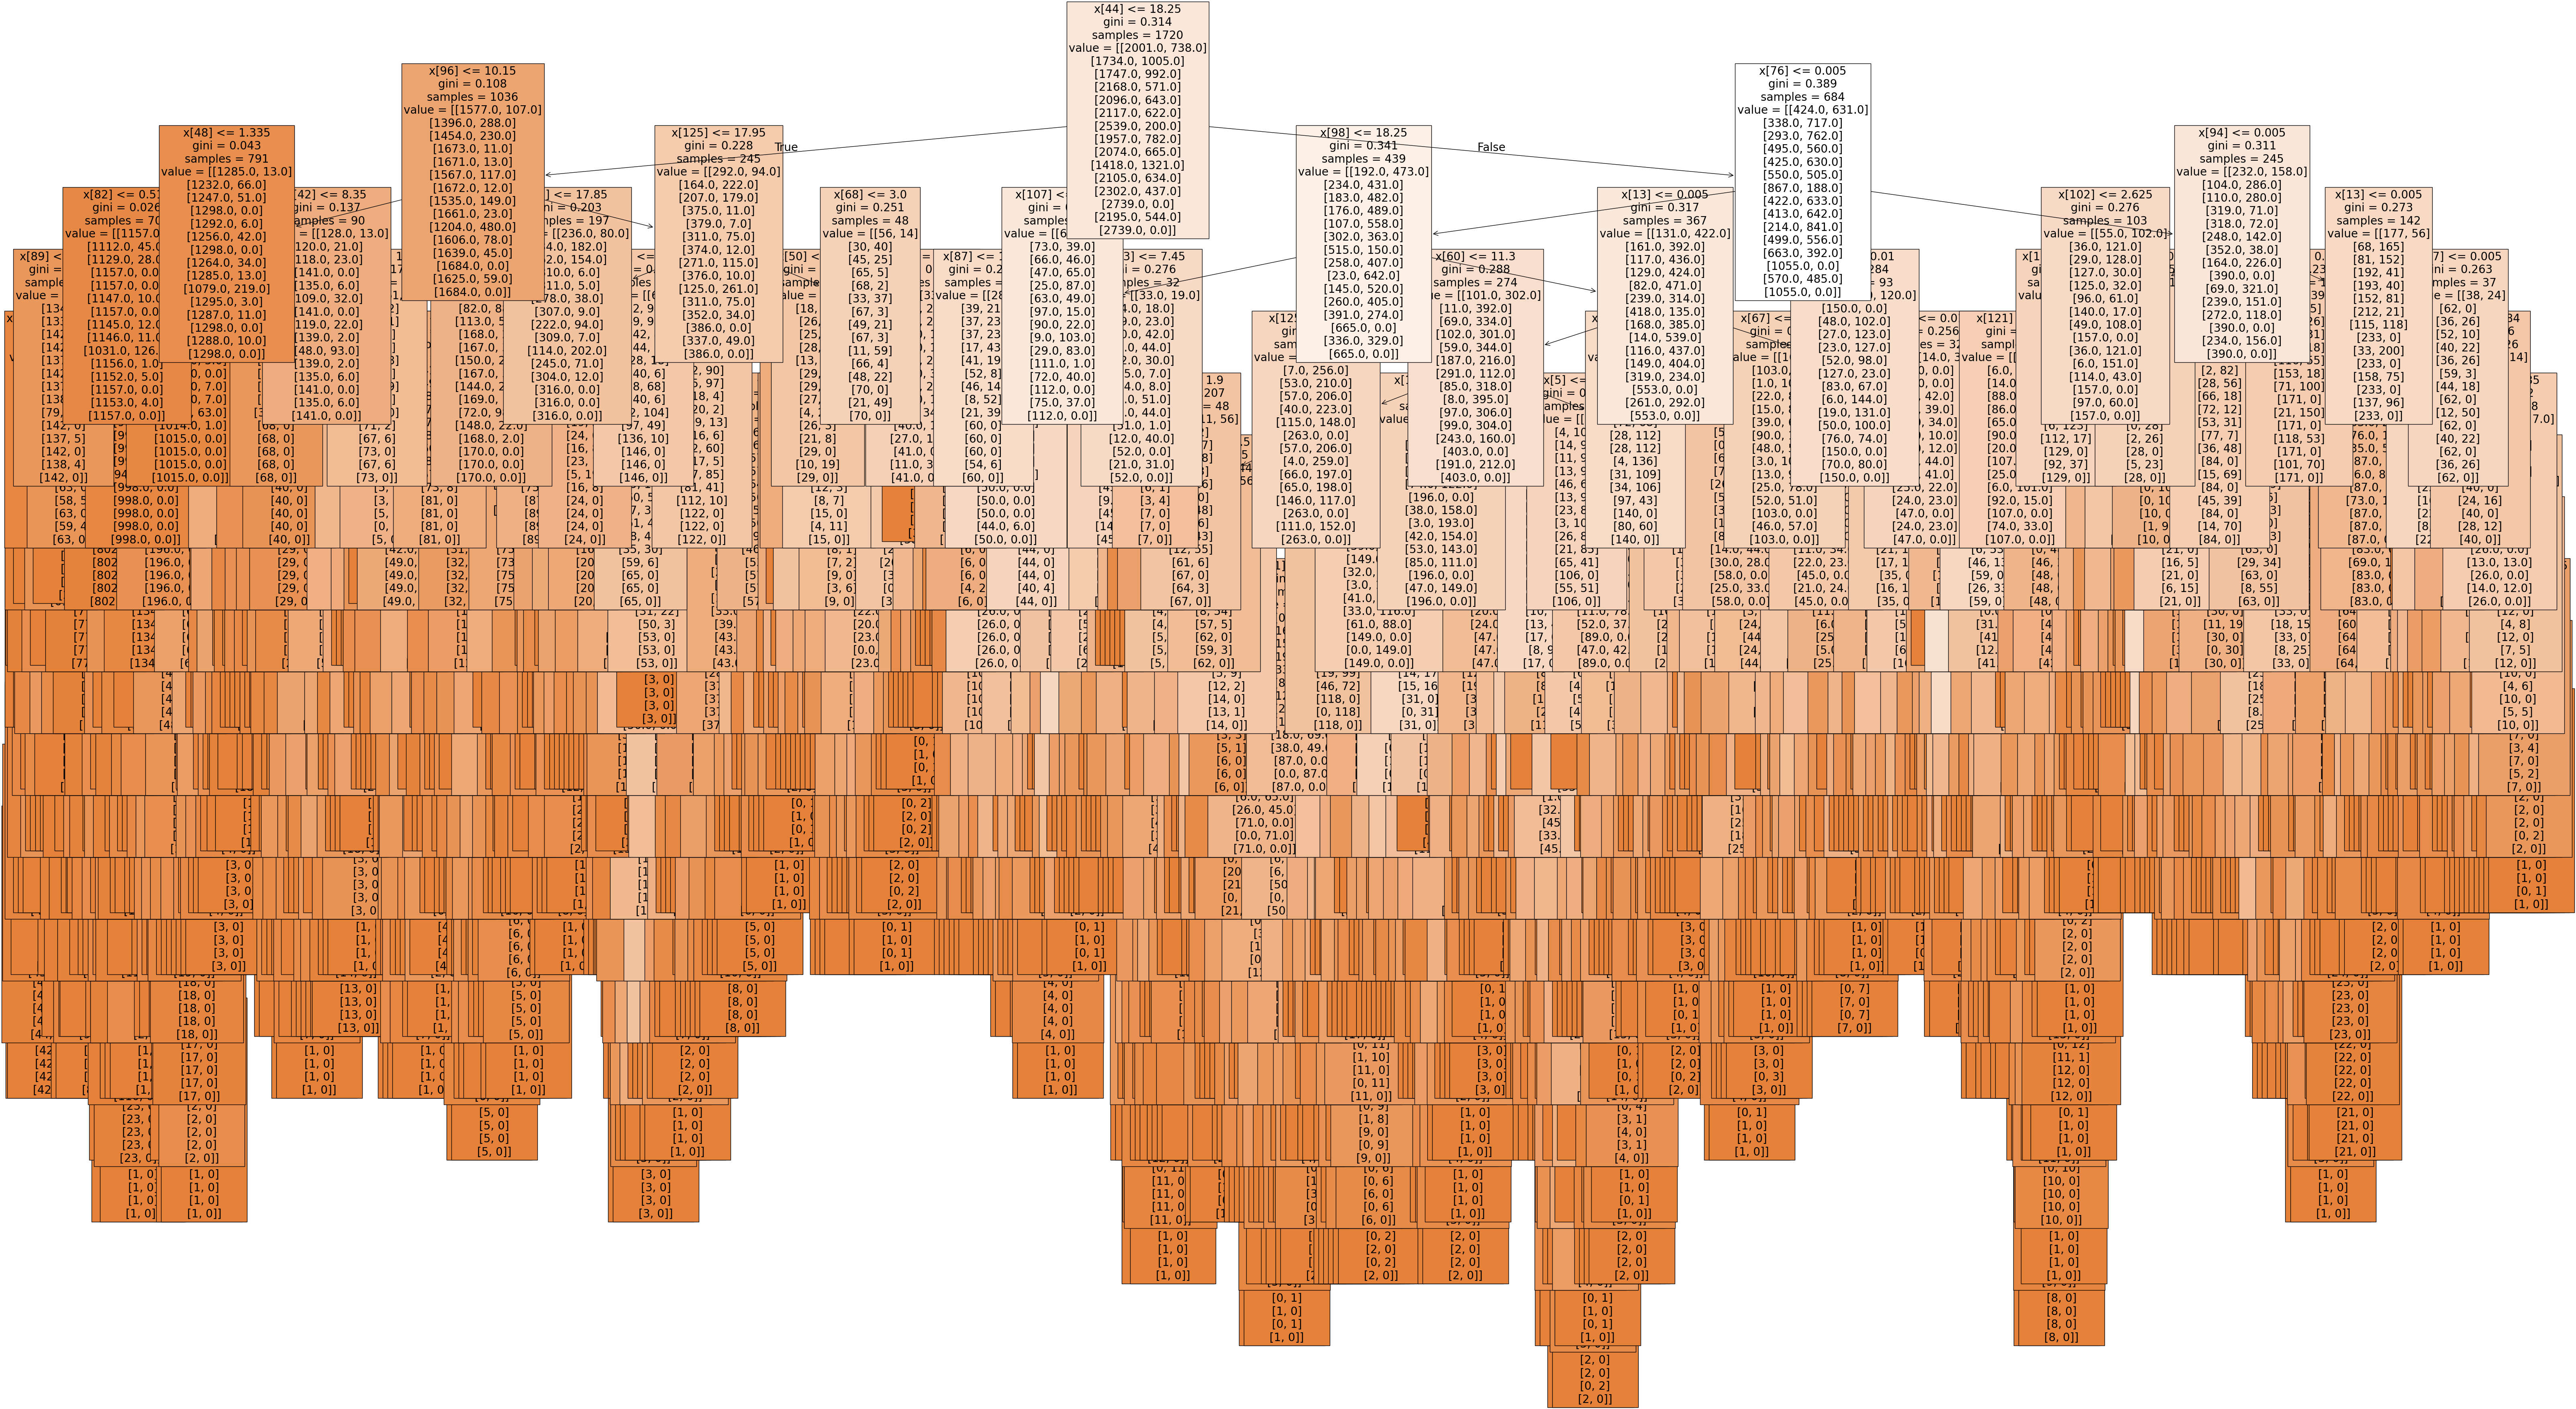

In [74]:
#Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

# Uncovering Feature Importance: Stations

In [77]:
#Retrieve feature importances from the trained model
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([2.97414049e-03, 3.63355516e-03, 3.76977350e-03, 3.26925812e-03,
       1.59125560e-02, 8.91129644e-03, 1.13346444e-02, 5.96085875e-03,
       1.69299787e-02, 4.09392506e-03, 3.39819580e-03, 3.80541654e-03,
       3.06100054e-03, 1.65914709e-02, 4.06232684e-03, 9.64470815e-03,
       3.61714007e-03, 1.28212337e-02, 3.96432153e-04, 0.00000000e+00,
       0.00000000e+00, 1.25258587e-03, 1.52663067e-02, 1.52414473e-03,
       1.34603659e-02, 8.12086879e-03, 2.08658995e-02, 2.23665253e-03,
       2.99312190e-03, 4.34245992e-03, 4.67931613e-03, 1.58207507e-02,
       5.02107410e-03, 1.65512387e-02, 5.07756224e-03, 3.93542589e-02,
       2.74438415e-03, 3.98148844e-03, 4.49195918e-03, 3.25879411e-03,
       2.08670127e-02, 5.13035815e-03, 2.01286533e-02, 2.99902938e-03,
       3.75639378e-02, 2.68851481e-03, 4.05950260e-03, 3.57031979e-03,
       4.41200631e-03, 1.10887025e-02, 4.10215671e-03, 1.32785509e-02,
       3.33519002e-03, 1.40458599e-02, 3.90700846e-03, 2.63542033e-03,
      

In [79]:
#Reshape the array
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[2.97414049e-03, 3.63355516e-03, 3.76977350e-03, 3.26925812e-03,
         1.59125560e-02, 8.91129644e-03, 1.13346444e-02, 5.96085875e-03,
         1.69299787e-02],
        [4.09392506e-03, 3.39819580e-03, 3.80541654e-03, 3.06100054e-03,
         1.65914709e-02, 4.06232684e-03, 9.64470815e-03, 3.61714007e-03,
         1.28212337e-02],
        [3.96432153e-04, 0.00000000e+00, 0.00000000e+00, 1.25258587e-03,
         1.52663067e-02, 1.52414473e-03, 1.34603659e-02, 8.12086879e-03,
         2.08658995e-02],
        [2.23665253e-03, 2.99312190e-03, 4.34245992e-03, 4.67931613e-03,
         1.58207507e-02, 5.02107410e-03, 1.65512387e-02, 5.07756224e-03,
         3.93542589e-02],
        [2.74438415e-03, 3.98148844e-03, 4.49195918e-03, 3.25879411e-03,
         2.08670127e-02, 5.13035815e-03, 2.01286533e-02, 2.99902938e-03,
         3.75639378e-02],
        [2.68851481e-03, 4.05950260e-03, 3.57031979e-03, 4.41200631e-03,
         1.10887025e-02, 4.10215671e-03, 1.32785509e-02, 3.33519002

In [81]:
#Collapse this shape into one observation for each weather station
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.07269606, 0.06109542, 0.0608866 , 0.09607644, 0.10116562,
       0.0605808 , 0.0312912 , 0.08376318, 0.13198569, 0.06769593,
       0.08771644, 0.05457669, 0.03445075, 0.05209138, 0.00392779])

In [83]:
#Convert the set of unique stations to a list
unique_stations_list = list(unique_stations)

In [85]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

MAASTRICHT    0.131986
HEATHROW      0.101166
STOCKHOLM     0.096076
DUSSELDORF    0.087716
LJUBLJANA     0.083763
BASEL         0.072696
SONNBLICK     0.067696
BELGRADE      0.061095
KASSEL        0.060887
VALENTIA      0.060581
OSLO          0.054577
BUDAPEST      0.052091
MADRID        0.034451
DEBILT        0.031291
MUNCHENB      0.003928
dtype: float64

In [87]:
#Create a dataframe to associate weather stations with their importance

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['BASEL', 'BELGRADE', 'KASSEL', 'STOCKHOLM', 'HEATHROW', 'VALENTIA', 'DEBILT', 'LJUBLJANA', 'MAASTRICHT', 'SONNBLICK', 'DUSSELDORF', 'OSLO', 'MADRID', 'BUDAPEST', 'MUNCHENB']


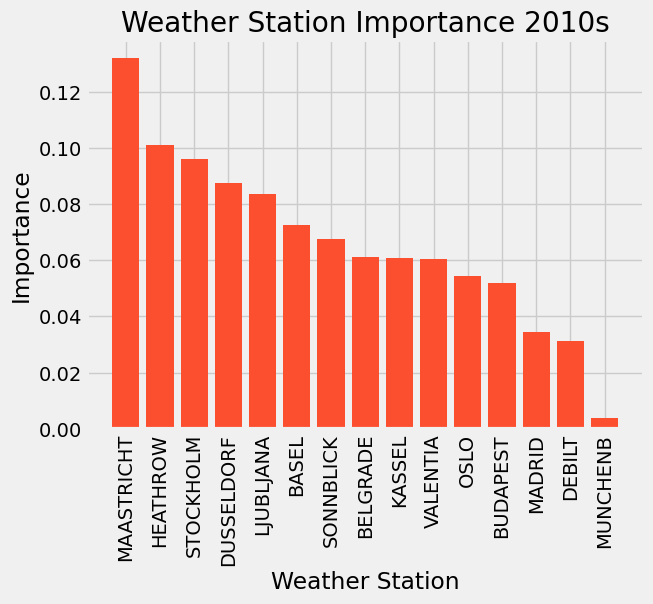

In [91]:
#Plot the results
%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')

plt.show()